<a href="https://colab.research.google.com/github/Dinu-Nimnara/CM2604_CW_2425587/blob/main/CM1604_CW_2425587.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Data loading and overview

Load the Telco Customer Churn dataset into a pandas DataFrame and perform an initial inspection.  
- structure of the dataset, types of features, missing values, and basic statistics.

In [ ]:
#Telco-Customer-Churn-Dataset

import pandas as pd

# Load dataset
df = pd.read_csv("/content/Telco-Customer-Churn-Dataset.csv")



**Dataset overview**

In [ ]:
# first few rows
print("-----Dataset Head -----")
display(df.head())

#dataset shape (rows, columns)
print("\n\n-------Dataset shape------\n", df.shape)

#data types and missing values
print("\n\n------ Dataset info -----")
df.info()


-----Dataset Head -----


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




-------Dataset shape------
 (7043, 21)


------ Dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          70

**Summary dtatistics**

In [ ]:

# Summary statistics
print("----- Summary -----")
display(df.describe())
df.columns.tolist()

print("\n----- Summary for Categorical Features -----")
display(df.describe(include='object'))



----- Summary -----


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



----- Summary for Categorical Features -----


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Missing values**

In [ ]:
# missing values per column
print("----- Missing values -----")
missing = df.isnull().sum()
print(missing)

display(missing[missing > 0] if missing.sum() > 0 else "No missing values")

# Percentage view (nice to have)
print("\n----- Missing Values (%) -----")
display((df.isnull().mean() * 100).round(2)[lambda x: x > 0])

----- Missing values -----
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


'No missing values'


----- Missing Values (%) -----


,0


**Duplications**

In [ ]:
#duplicate rows
print("----- Duplication rows -----")
print(df.duplicated().sum())


----- Duplication rows -----
0


**Unique values**

In [ ]:
# #unique values
# print("----- Unique values -----")
# df.nunique()

print("----- Number of Unique Values per Column -----")
unique_counts = df.nunique().sort_values(ascending=False)
display(pd.DataFrame({'Column': unique_counts.index, 'Unique_Count': unique_counts.values}))

#high-cardinality features
print("\nHigh cardinality columns (>50 unique values):")
display(unique_counts[unique_counts > 50])

----- Number of Unique Values per Column -----


,Column,Unique_Count
0,customerID,7043
1,TotalCharges,6531
2,MonthlyCharges,1585
3,tenure,73
4,PaymentMethod,4
5,StreamingMovies,3
6,TechSupport,3
7,OnlineBackup,3
8,StreamingTV,3
9,DeviceProtection,3



High cardinality columns (>50 unique values):


,0
customerID,7043
TotalCharges,6531
MonthlyCharges,1585
tenure,73


**Summary table**

In [ ]:
summary = pd.DataFrame({
    'Dtype': df.dtypes,
    'Missing': df.isnull().sum(),
    'Missing_%': (df.isnull().mean() * 100).round(2),
    'Unique': df.nunique(),
    'Duplicates': len(df) - len(df.drop_duplicates())
}, index=df.columns)

display(summary)

,Dtype,Missing,Missing_%,Unique,Duplicates
customerID,object,0,0.0,7043,0
gender,object,0,0.0,2,0
SeniorCitizen,int64,0,0.0,2,0
Partner,object,0,0.0,2,0
Dependents,object,0,0.0,2,0
tenure,int64,0,0.0,73,0
PhoneService,object,0,0.0,2,0
MultipleLines,object,0,0.0,3,0
InternetService,object,0,0.0,3,0
OnlineSecurity,object,0,0.0,3,0


**Fixing hidden totalCHarges issue**

In [ ]:

print("Fixing TotalCharges (11 hidden blank values)...")

# Before status
print(f"Before → dtype: {df['TotalCharges'].dtype}")
print(f"Blank strings found: {(df['TotalCharges'] == ' ').sum()}")

# Fix
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')        # " " → NaN
df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)   # smart imputation

# After status
print(f"After  → dtype: {df['TotalCharges'].dtype}")
print(f"Final missing values: {df['TotalCharges'].isna().sum()}")

Fixing TotalCharges (11 hidden blank values)...
Before → dtype: object
Blank strings found: 11
After  → dtype: float64
Final missing values: 0


/tmp/ipython-input-1666643343.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)   # smart imputation


# 02. Exploratory Data Analysis - EDA

-The distribution of the target variable (Churn)

-Patterns in numerical and categorical features

-Correlations between key variables

Identify factors influencing churn and support feature engineering

In [13]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns


**Churn distribution with perc lables**

/tmp/ipython-input-1922527173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


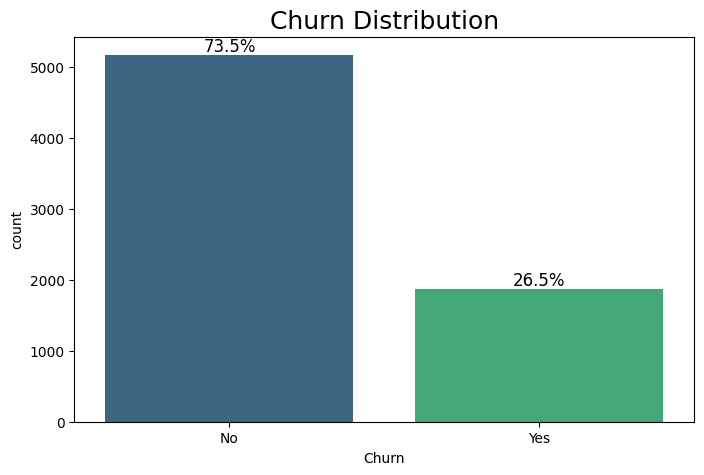

Churn rate: 26.5%


In [14]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn Distribution', fontsize=18)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(df):.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

print(f"Churn rate: {df['Churn'].value_counts(normalize=True)['Yes']*100:.1f}%")

**Numerical Feature Distributions**

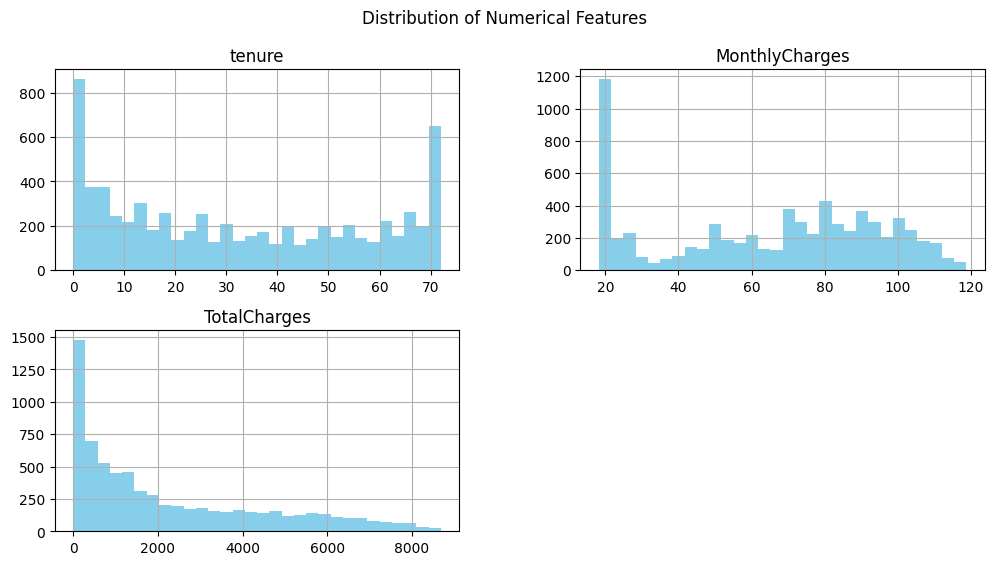

In [15]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numerical_cols].hist(figsize=(12, 6), bins=30, color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()


**Numerical Features vs Churn - Boxplots**

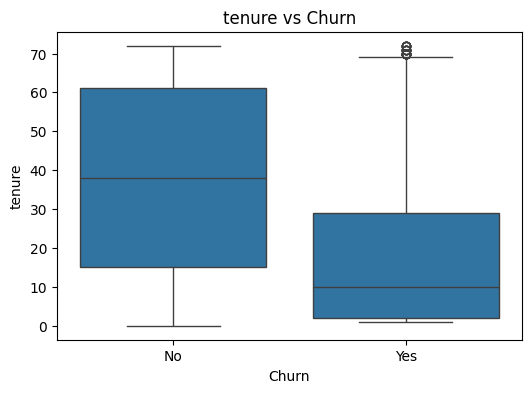

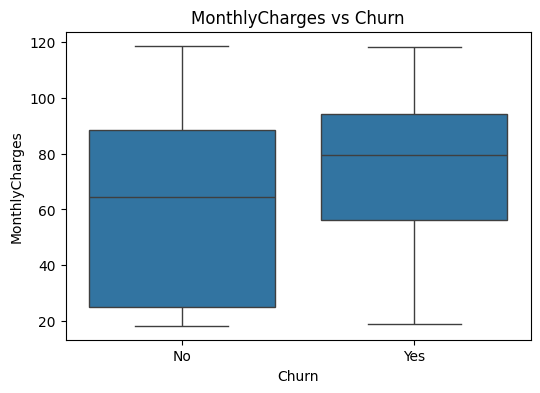

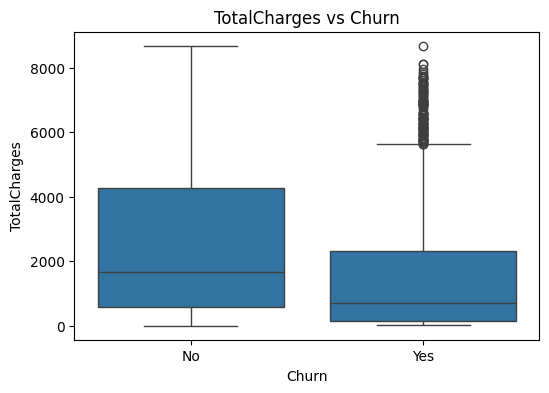

In [16]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


**Categorical Features vs Churn (Barplots)**

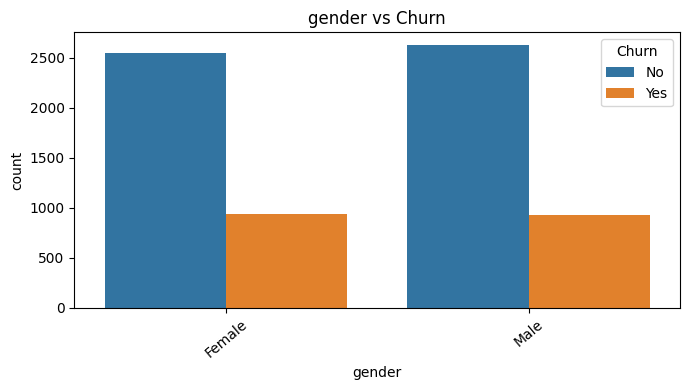

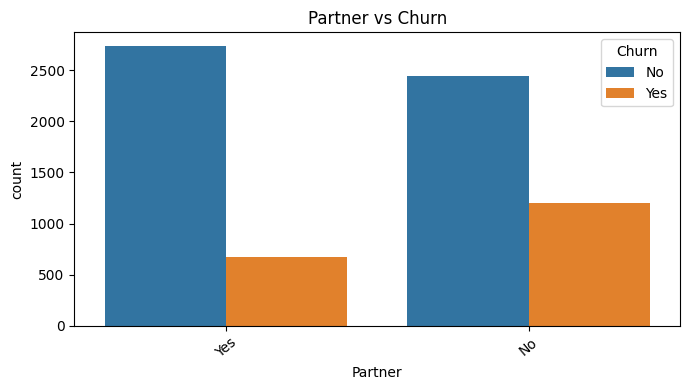

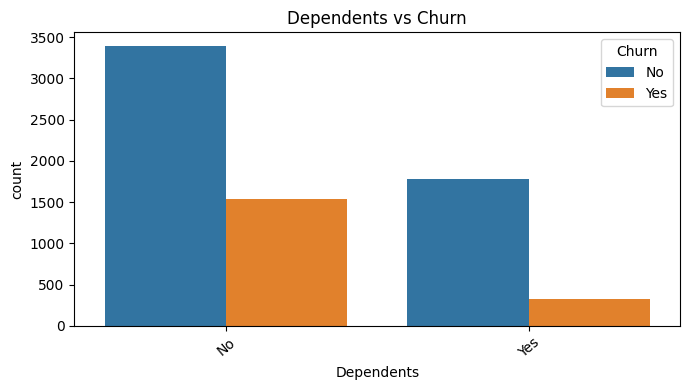

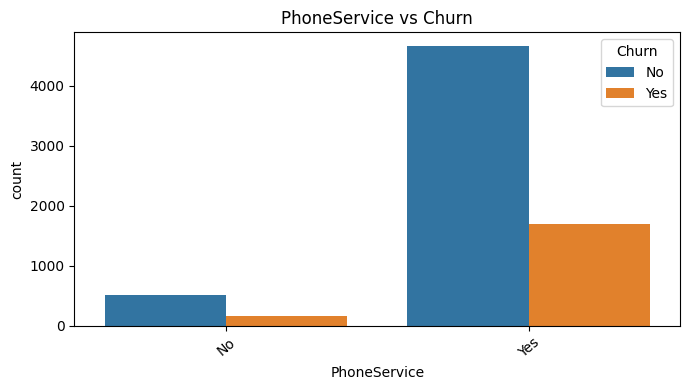

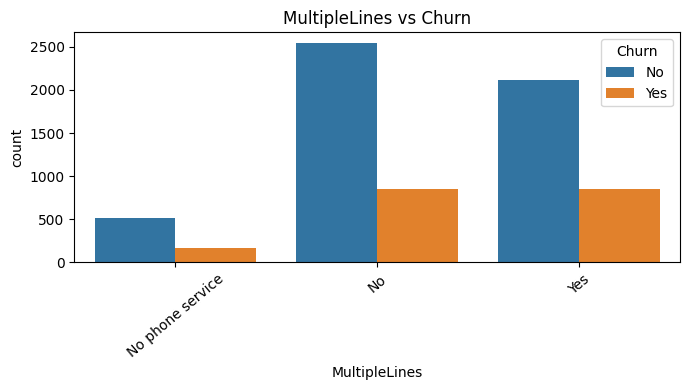

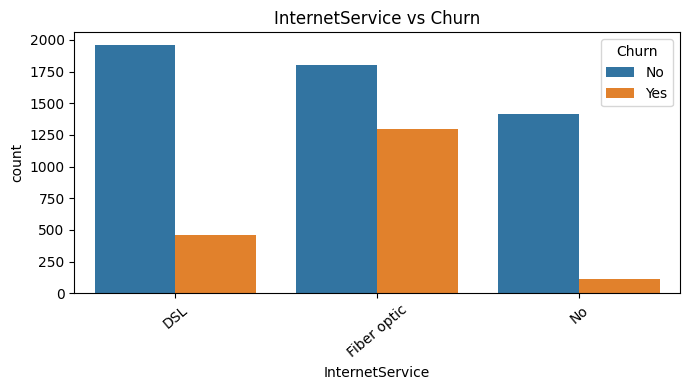

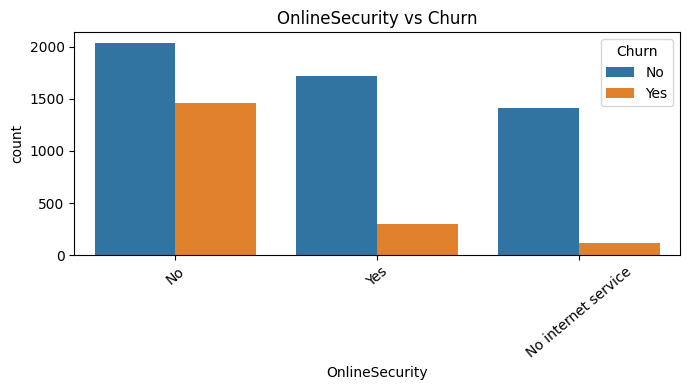

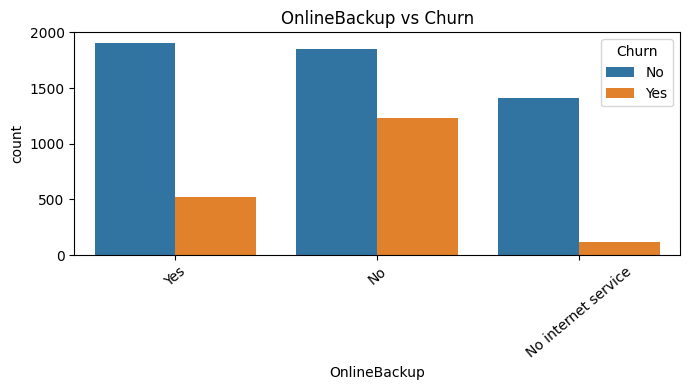

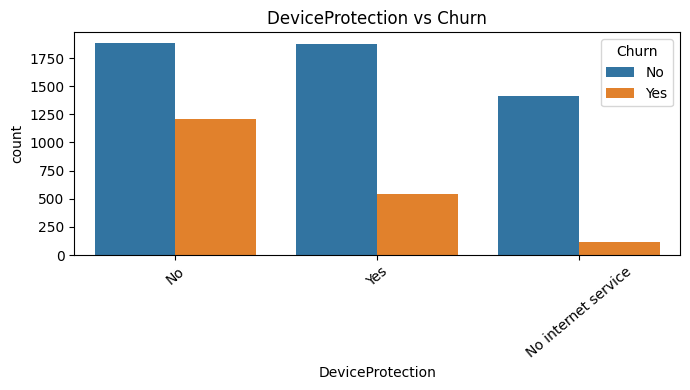

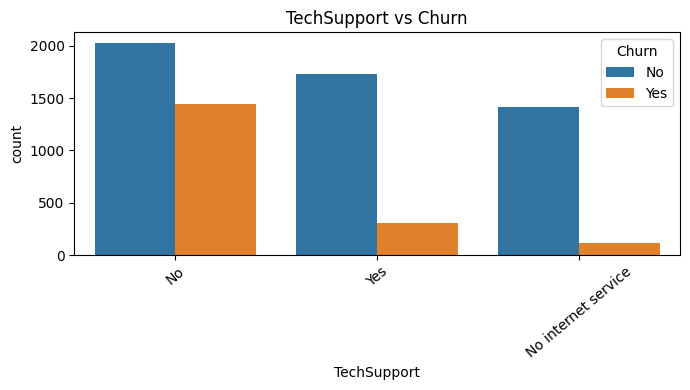

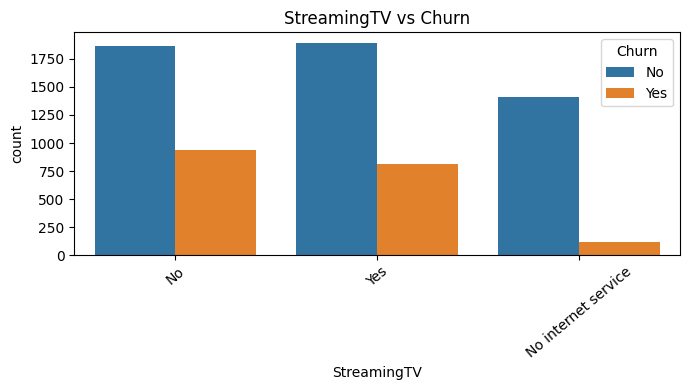

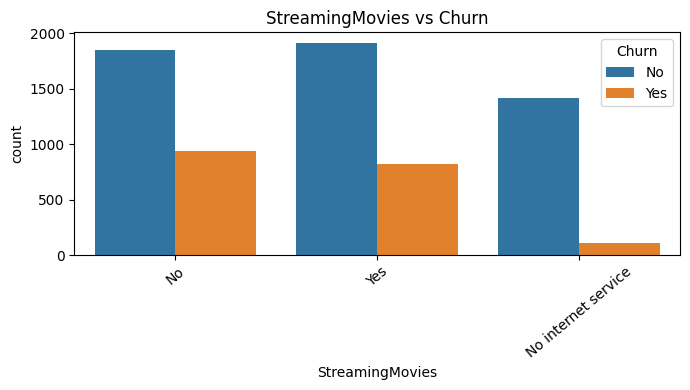

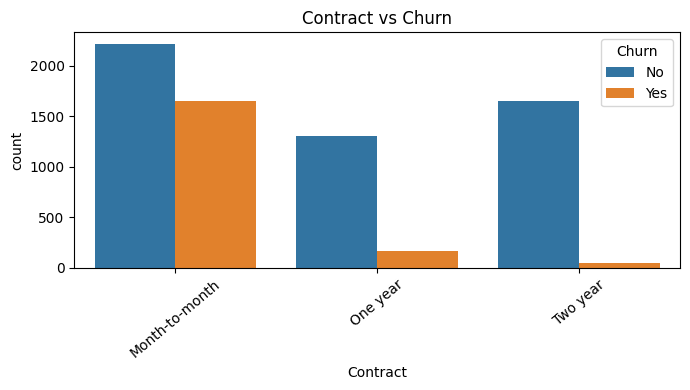

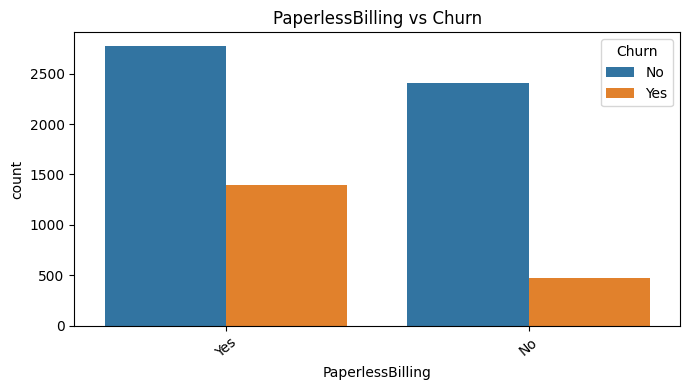

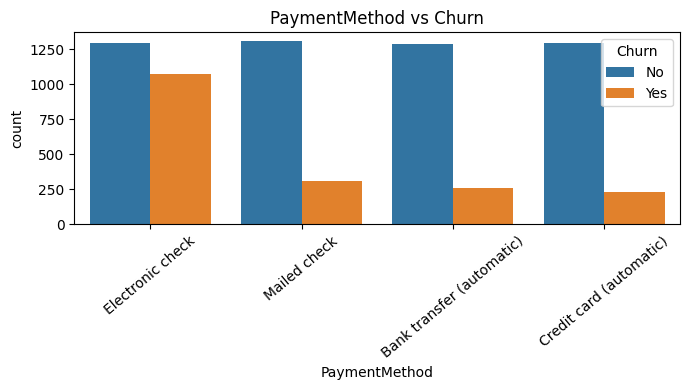

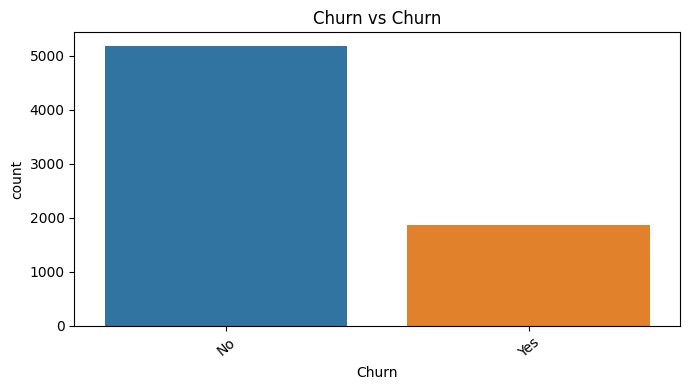

In [17]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=40)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()
    plt.show()


**Correlation Heatmap - numerical**

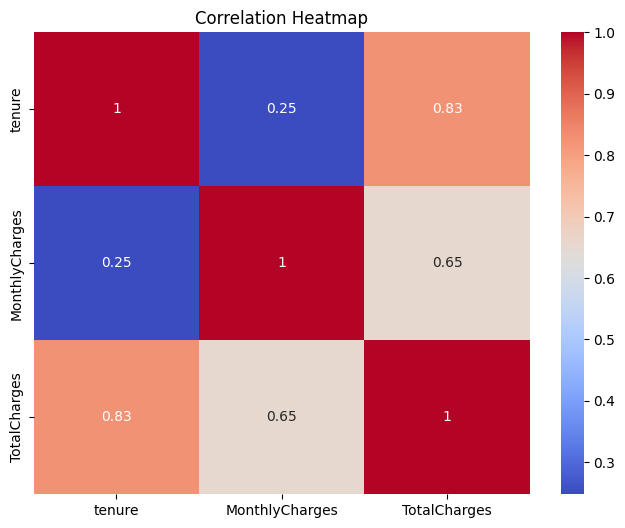

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Tenure Binning**

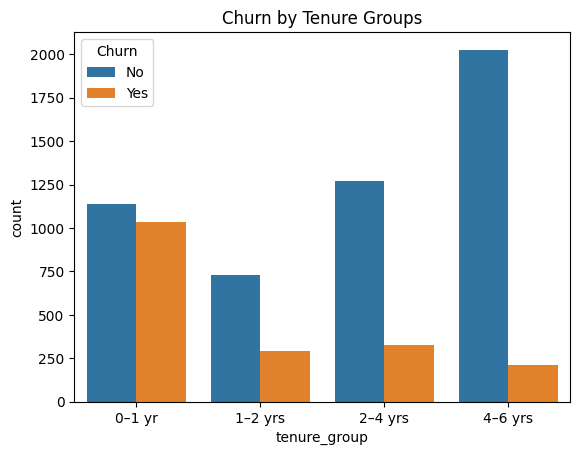

In [19]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0–1 yr', '1–2 yrs', '2–4 yrs', '4–6 yrs']
)

sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title("Churn by Tenure Groups")
plt.show()


**Churn Rate by Contract Type**

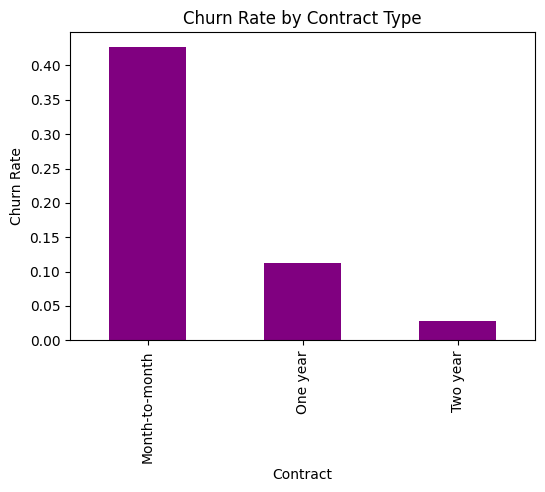

In [20]:
contract_churn = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()
contract_churn["Yes"].plot(kind="bar", figsize=(6,4), color="purple")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


# 03. Data cleaning and Pre processing

# 04. Feature Engineering

# 05. Decision Tree Model

# 06. Neural Network Model

# 07. Model Evaluation & Comparison